In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

from Functions import Load_LC, NormalizeFlux

In [2]:
#File Locations for HAT_P-2b
HAT_P_2_Loc = ["data/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000039903405-s0024_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000039903405-s0024_tess_v1_lc.fits",
            "data/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000039903405-s0025_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000039903405-s0025_tess_v1_lc.fits"
]
Time1, Flux1 = Load_LC(HAT_P_2_Loc)


HD189733_Loc = ["data/mastDownload/TESS/tess2021204101404-s0041-0000000256364928-0212-s/tess2021204101404-s0041-0000000256364928-0212-s_lc.fits" ]
Time2, Flux2 = Load_LC(HD189733_Loc)


#Save the flux around the transit
T0 = [ 2455288.84969, #de Wit et al. 2017
        2453955.525551 #Bonomo et al. 2017
]


Period = [ 5.6334675, #de Wit et al. 2017
           2.218575200 #Bonomo et al. 2017
         ]


TDur = [4.28/24.0,   #Pal et al 2010
        1.84/24.0*1.2    #Addison et al 2019
        ]

In [3]:
#Find where the transit occurs
TransitMask1 = np.abs(Time1-T0[0]+TDur[0]/2.*1.5)%Period[0]<TDur[0]*1.5
TransitMask2_1 = np.abs(Time2-T0[1]+TDur[1]/2.)%Period[1]<TDur[1]
TransitMask2_2 = np.abs(Time2-T0[1]+TDur[1]/2.*2.5)%Period[1]<TDur[1]*2.5


#Get lomb scargle for HAT-P-2b
frequency, power = LombScargle(Time1[~TransitMask1], Time1[~TransitMask1]).autopower()




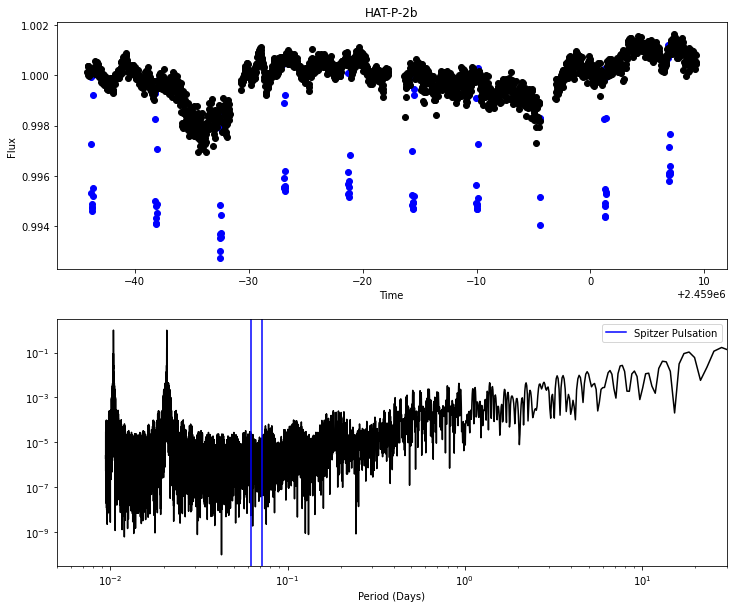

In [5]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(Time1[TransitMask1], Flux1[TransitMask1], "bo", label="Transit Points")
plt.plot(Time1[~TransitMask1], Flux1[~TransitMask1], "ko", label="Non-Transit Points")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("HAT-P-2b")
plt.subplot(212)
plt.plot(1./frequency, power, "k-")

plt.axvline(x=Period[0]/79, color="blue", label="Spitzer Pulsation")
plt.axvline(x=Period[0]/91, color="blue")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=1)
plt.xlabel("Period (Days)")
plt.xlim(0.005, 30)
plt.show()


#plt.figure(figsize=(12,8))
#plt.plot(Time2[~TransitMask2_1], Flux2[~TransitMask2_1], "ko")
#plt.plot(Time2[TransitMask2_1], Flux2[TransitMask2_1], "ro")
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [46]:
unique_transits

array([2458956., 2458962., 2458967., 2458968., 2458973., 2458979.,
       2458984., 2458985., 2458990., 2458996., 2459001., 2459007.])

0.022367449656760158
0.00079519337
Wait here...


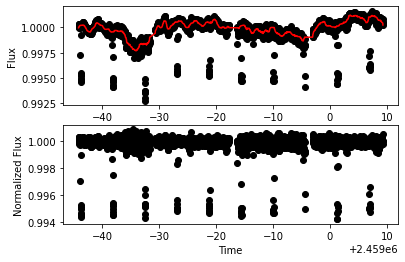

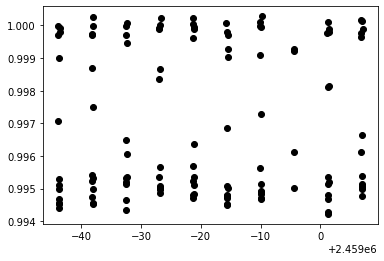

In [17]:
print(np.mean(np.diff(Time1)))

#Flux2 = Flux2[~np.isnan(Flux2)]
print(np.nanstd(Flux1[~TransitMask1]))
input("Wait here...")

SelectedTime = Time1[TransitMask1]
SelectedFlux = Flux1[TransitMask1]


NormalizedFlux1 = NormalizeFlux(Time1, Flux1, TransitMask1)
#NormalizedFlux = NormalizeFlux(Time2, Flux2, TransitMask2_1)


plt.figure()
plt.plot(Time1[TransitMask1], NormalizedFlux1[TransitMask1], "ko")
plt.show()


#np.savetxt("HD189733bLC.txt", np.transpose((Time2[TransitMask2_2], NormalizedFlux[TransitMask2_2])), header="Time, Flux", delimiter=",")

np.savetxt("HATP2bLC.txt", np.transpose((Time1[TransitMask1], NormalizedFlux1[TransitMask1])), header="Time, Flux", delimiter=",")
#Now now normalize the light curve

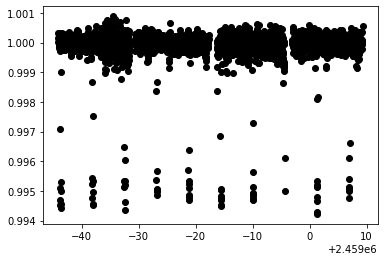

In [61]:
plt.figure()
plt.plot(Time1, NormalizedFlux1, "ko")
plt.show()